### Toy example of linear regression using tensorflow
I follow the instruction of this video [Tensorflow Basics Tutorial Series - (Pt.1) Linear Regression](https://www.youtube.com/watch?v=Xiab2JhwzYY).

The tutorial is easy understanding with short code example

In [1]:
# data operation
import numpy as np
# ml package
import tensorflow as tf
# visualization
import matplotlib.pyplot as plt

/home/alex/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# check which jupyter it is pip or anaconda?
import sys
sys.executable

'/usr/bin/python3'

In [3]:
learning_rate = 0.01
epochs = 400

In [4]:
n_samples = 200
train_x = np.linspace(0, 2 * np.pi, n_samples) #np.linspace(0, 20, n_samples)
train_y = np.sin(train_x) + 3 * np.random.randn() 

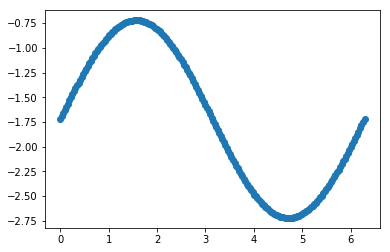

In [5]:
%matplotlib inline
plt.plot(train_x, train_y, 'o')
plt.show()

polynomial function y = $a \times x^{3} + b \times x{2} + c \times x + d $

In [36]:
X = tf.placeholder(tf.float32) # vector length= 3
Y = tf.placeholder(tf.float32)

A = tf.Variable(np.random.randn(), name='weights_1')
B = tf.Variable(np.random.randn(), name='weights_2')
C = tf.Variable(np.random.randn(), name='weights_3')
D = tf.Variable(np.random.randn(), name='bias')

In [37]:
pred = A * X**3 + B * X**2 + C * X + D
# pred = tf.add( tf.multiply(a, tf.pow(X, 3)), \
#               tf.square(X), \
#               tf.multiply(c, X),\
#               d)
# pred = tf.add( tf.multiply(a, tf.pow(X, 3)), \
#               tf.square(X))

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [38]:
init = tf.global_variables_initializer()

### Error message
* [csdn - TypeError: Can not convert a float32 into a Tensor or Operation.](https://blog.csdn.net/FontThrone/article/details/77017002)

epoch: epoch= 0 loss=19.05 a=0.29 b=-1.85 c=-0.39 d=0.66
epoch: epoch=10 loss=11.71 a=0.25 b=-1.59 c=-0.22 d=0.73
epoch: epoch=20 loss=7.38 a=0.21 b=-1.38 c=-0.09 d=0.77
epoch: epoch=30 loss=4.82 a=0.19 b=-1.23 c=-0.00 d=0.80
epoch: epoch=40 loss=3.28 a=0.16 b=-1.11 c=0.06 d=0.81
epoch: epoch=50 loss=2.32 a=0.15 b=-1.02 c=0.11 d=0.81
epoch: epoch=60 loss=1.73 a=0.14 b=-0.95 c=0.15 d=0.80
epoch: epoch=70 loss=1.35 a=0.13 b=-0.89 c=0.17 d=0.78
epoch: epoch=80 loss=1.10 a=0.12 b=-0.84 c=0.19 d=0.76
epoch: epoch=90 loss=0.92 a=0.11 b=-0.81 c=0.20 d=0.74
epoch: epoch=100 loss=0.80 a=0.11 b=-0.78 c=0.20 d=0.72
epoch: epoch=110 loss=0.71 a=0.10 b=-0.75 c=0.21 d=0.69
epoch: epoch=120 loss=0.64 a=0.10 b=-0.73 c=0.21 d=0.67
epoch: epoch=130 loss=0.59 a=0.10 b=-0.71 c=0.21 d=0.64
epoch: epoch=140 loss=0.54 a=0.10 b=-0.69 c=0.21 d=0.61
epoch: epoch=150 loss=0.50 a=0.09 b=-0.67 c=0.21 d=0.58
epoch: epoch=160 loss=0.47 a=0.09 b=-0.66 c=0.20 d=0.56
epoch: epoch=170 loss=0.45 a=0.09 b=-0.65 c=0.20 d=0

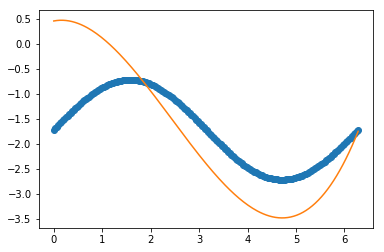

In [47]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 10:
            loss = sess.run(cost, feed_dict={X: train_x, Y: train_y})
            
            a_epoch = sess.run(A)
            b_epoch = sess.run(B)
            c_epoch = sess.run(C)
            d_epoch = sess.run(D)
            
            print('epoch: epoch={:2d} loss={:.2f} a={:.2f} b={:.2f} c={:.2f} d={:.2f}'.format(epoch, loss, a_epoch, b_epoch, c_epoch, d_epoch))
            
    a_epoch = sess.run(A)
    b_epoch = sess.run(B)
    c_epoch = sess.run(C)
    d_epoch = sess.run(D)
    
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, a_epoch * train_x**3 + b_epoch * train_x**2 + c_epoch * train_x + d_epoch)
    plt.show()